# Aircraft Turnaround Delay Risk & Impact Prediction

## Problem Statement
Aircraft turnaround is the process between an aircraft's arrival and its
next departure. Delays during this phase can cascade into network-wide
disruptions, increased operational costs, and passenger dissatisfaction.

This project aims to:
1. Predict whether a flight is at risk of turnaround delay
2. Estimate the potential delay duration

The goal is to demonstrate how machine learning can support
proactive operational planning at airports.

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 1500

data = pd.DataFrame({
    "arrival_delay_minutes": np.random.randint(0, 120, n_samples),
    "aircraft_type": np.random.choice(
        ["Narrowbody", "Widebody"], n_samples, p=[0.7, 0.3]
    ),
    "gate_availability": np.random.choice(
        ["Available", "Constrained"], n_samples, p=[0.75, 0.25]
    ),
    "ground_staff_level": np.random.choice(
        ["Adequate", "Low"], n_samples, p=[0.7, 0.3]
    ),
    "weather_condition": np.random.choice(
        ["Clear", "Rain", "Storm"], n_samples, p=[0.6, 0.3, 0.1]
    ),
    "time_of_day": np.random.choice(
        ["Off-Peak", "Peak"], n_samples, p=[0.55, 0.45]
    )
})

Create Delay Risk Logic

In [2]:
delay_risk_score = (
    data["arrival_delay_minutes"] * 0.02 +
    data["aircraft_type"].map({"Narrowbody": 0.2, "Widebody": 0.5}) +
    data["gate_availability"].map({"Available": 0.1, "Constrained": 0.6}) +
    data["ground_staff_level"].map({"Adequate": 0.1, "Low": 0.5}) +
    data["weather_condition"].map({"Clear": 0.1, "Rain": 0.3, "Storm": 0.7}) +
    data["time_of_day"].map({"Off-Peak": 0.1, "Peak": 0.4})
)

data["turnaround_delay_risk"] = (delay_risk_score > 2.0).astype(int)

Create Delay Duration (Impact)

In [3]:
data["turnaround_delay_minutes"] = (
    data["arrival_delay_minutes"] +
    data["turnaround_delay_risk"] * np.random.randint(10, 60, n_samples)
).clip(0)

data.head()

,arrival_delay_minutes,aircraft_type,gate_availability,ground_staff_level,weather_condition,time_of_day,turnaround_delay_risk,turnaround_delay_minutes
0,102,Widebody,Available,Low,Clear,Peak,1,155
1,51,Widebody,Available,Adequate,Clear,Peak,1,82
2,92,Widebody,Available,Adequate,Clear,Off-Peak,1,139
3,14,Narrowbody,Available,Adequate,Rain,Off-Peak,0,14
4,106,Narrowbody,Available,Adequate,Rain,Off-Peak,1,131


Save the dataset

In [4]:
data.to_csv("synthetic_aircraft_turnaround_data.csv", index=False)

Load the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("synthetic_aircraft_turnaround_data.csv")
data.head()

,arrival_delay_minutes,aircraft_type,gate_availability,ground_staff_level,weather_condition,time_of_day,turnaround_delay_risk,turnaround_delay_minutes
0,102,Widebody,Available,Low,Clear,Peak,1,155
1,51,Widebody,Available,Adequate,Clear,Peak,1,82
2,92,Widebody,Available,Adequate,Clear,Off-Peak,1,139
3,14,Narrowbody,Available,Adequate,Rain,Off-Peak,0,14
4,106,Narrowbody,Available,Adequate,Rain,Off-Peak,1,131


Basic data sanity check

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   arrival_delay_minutes     1500 non-null   int64 
 1   aircraft_type             1500 non-null   object
 2   gate_availability         1500 non-null   object
 3   ground_staff_level        1500 non-null   object
 4   weather_condition         1500 non-null   object
 5   time_of_day               1500 non-null   object
 6   turnaround_delay_risk     1500 non-null   int64 
 7   turnaround_delay_minutes  1500 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 93.9+ KB


,arrival_delay_minutes,turnaround_delay_risk,turnaround_delay_minutes
count,1500.000000,1500.000000,1500.000000
mean,59.074667,0.649333,81.652000
std,35.365995,0.477338,50.281531
min,0.000000,0.000000,0.000000
25%,28.000000,0.000000,32.000000
50%,59.000000,1.000000,89.500000
75%,91.000000,1.000000,124.000000
max,119.000000,1.000000,178.000000


The dataset represents simulated aircraft turnaround scenarios with
both operational and environmental factors.
No missing values are present, enabling consistent analysis and modeling.

How common are turnaround delays?

In [7]:
data["turnaround_delay_risk"].value_counts(normalize=True)

,proportion
turnaround_delay_risk,
1,0.649333
0,0.350667


Turnaround delays are not the majority of cases, but they occur
often enough to create operational and network-wide impact.

Arrival delay vs turnaround delay risk

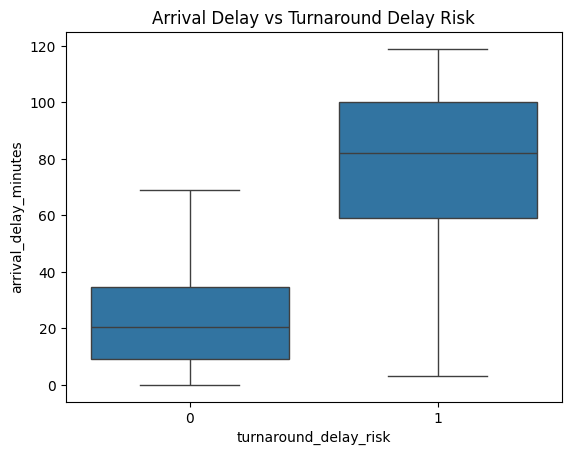

In [8]:
sns.boxplot(
    x="turnaround_delay_risk",
    y="arrival_delay_minutes",
    data=data
)
plt.title("Arrival Delay vs Turnaround Delay Risk")
plt.show()

Flights with higher arrival delays show a greater likelihood
of experiencing turnaround delays, indicating compounding effects.

Gate availability impact

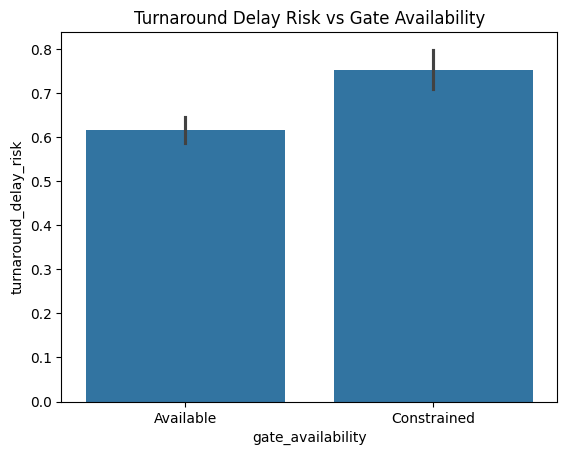

In [9]:
sns.barplot(
    x="gate_availability",
    y="turnaround_delay_risk",
    data=data
)
plt.title("Turnaround Delay Risk vs Gate Availability")
plt.show()

Gate constraints significantly increase turnaround delay risk,
highlighting infrastructure availability as a critical bottleneck.

Staffing level impact

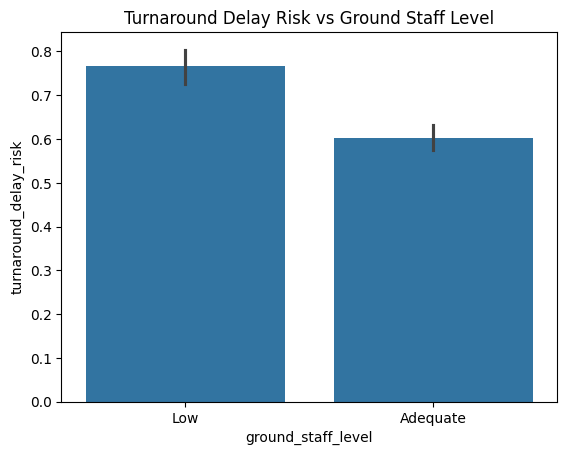

In [10]:
sns.barplot(
    x="ground_staff_level",
    y="turnaround_delay_risk",
    data=data
)
plt.title("Turnaround Delay Risk vs Ground Staff Level")
plt.show()

Low ground staff availability correlates with higher turnaround delay risk,
emphasizing the human factor in operational performance.

Cost / Impact proxy: How bad do delays get?

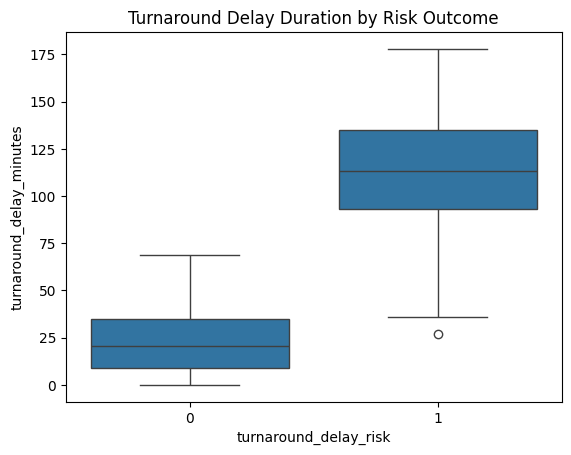

In [11]:
sns.boxplot(
    x="turnaround_delay_risk",
    y="turnaround_delay_minutes",
    data=data
)
plt.title("Turnaround Delay Duration by Risk Outcome")
plt.show()

Flights flagged as high risk tend to experience longer
turnaround delays, validating the risk classification logic.

## EDA Insights Summary

- Arrival delays compound downstream turnaround delays.
- Gate availability is a major operational bottleneck.
- Ground staffing levels significantly influence turnaround performance.
- Turnaround delays are infrequent but operationally expensive events.


## Modeling Strategy

The objective of modeling is not to achieve maximum accuracy,
but to support operational decision-making with interpretable results.

Two models are used:
1. A classification model to predict turnaround delay risk
2. A regression model to estimate potential delay duration

Simple and explainable models are preferred to ensure transparency
and trust in operational environments.


Prepare Features & Targets

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
X = data.drop(columns=["turnaround_delay_risk", "turnaround_delay_minutes"])
y_risk = data["turnaround_delay_risk"]
y_delay = data["turnaround_delay_minutes"]

Identify Categorical vs Numerical Features

In [14]:
categorical_features = [
    "aircraft_type",
    "gate_availability",
    "ground_staff_level",
    "weather_condition",
    "time_of_day"
]

numerical_features = [
    "arrival_delay_minutes"
]

Preprocessing Pipeline

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

Train–Test Split

In [16]:
X_train, X_test, y_train_risk, y_test_risk = train_test_split(
    X, y_risk, test_size=0.2, random_state=42, stratify=y_risk
)

_, _, y_train_delay, y_test_delay = train_test_split(
    X, y_delay, test_size=0.2, random_state=42
)

Model 1: Turnaround Delay Risk (Classification)

In [17]:
from sklearn.linear_model import LogisticRegression

risk_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

risk_model.fit(X_train, y_train_risk)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['aircraft_type',
                                                   'gate_availability',
                                                   'ground_staff_level',
                                                   'weather_condition',
                                                   'time_of_day']),
                                                 ('num', 'passthrough',
                                                  ['arrival_delay_minutes'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Model 2: Delay Duration (Regression)

In [18]:
from sklearn.linear_model import LinearRegression

delay_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

delay_model.fit(X_train, y_train_delay)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['aircraft_type',
                                                   'gate_availability',
                                                   'ground_staff_level',
                                                   'weather_condition',
                                                   'time_of_day']),
                                                 ('num', 'passthrough',
                                                  ['arrival_delay_minutes'])])),
                ('regressor', LinearRegression())])

Separating risk prediction from delay duration estimation
reflects real-world operational workflows.

This allows planners to:
- Identify high-risk flights early
- Allocate resources proactively
- Prepare mitigation strategies for severe cases


Evaluate Turnaround Delay Risk Model (Classification)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_risk = risk_model.predict(X_test)

print(classification_report(y_test_risk, y_pred_risk))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.97      0.98      0.98       195

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300



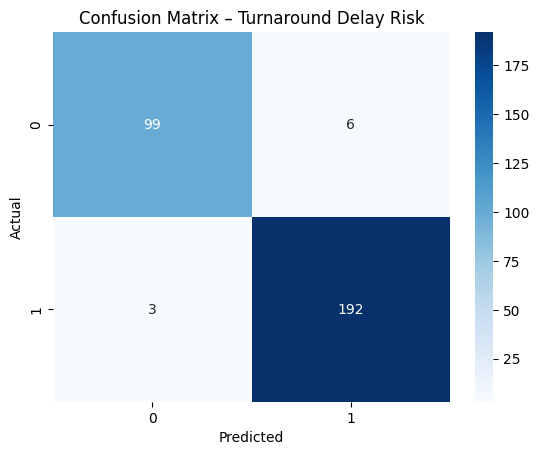

In [20]:
cm = confusion_matrix(y_test_risk, y_pred_risk)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Turnaround Delay Risk")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The risk prediction model shows reasonable performance given the
simplified and synthetic nature of the dataset.

In airport operations, missing a high-risk flight (false negative)
is often more costly than flagging a low-risk flight unnecessarily.

Evaluate Delay Duration Model (Regression)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_delay = delay_model.predict(X_test)

mae = mean_absolute_error(y_test_delay, y_pred_delay)
rmse = np.sqrt(mean_squared_error(y_test_delay, y_pred_delay))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 45.22
RMSE: 51.35


The delay duration model captures the general relationship between
operational conditions and turnaround delay length.

In practice, providing an estimated range or order of magnitude
is often more valuable than precise minute-level accuracy.

## Operational Reflection

Simple and interpretable models were intentionally selected
to ensure transparency and trust.

In airport environments:
- Decisions must be explainable
- Outputs must be auditable
- Human oversight remains essential

Machine learning is positioned as a decision-support tool,
not as an automated controller.

## Limitations & Ethical Considerations

- The dataset is synthetic and based on assumed relationships.
- Real-world operations involve additional constraints,
  unexpected events, and data quality issues.
- Model outputs should not be used as the sole basis
  for operational decisions.

Human judgment and domain expertise remain critical,
especially in safety-sensitive environments.

## Conclusion

This project demonstrates how machine learning can be applied
responsibly to aircraft turnaround operations.

By focusing on operational relevance, interpretability,
and limitations, the project highlights the role of ML
in supporting proactive and risk-aware airport planning.